In [1]:
import numpy as np 
import pandas as pd
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import os

Using TensorFlow backend.


In [2]:
PATH = os.getcwd()
# Define data path
data_path = "E:" + '\Money'
data_dir_list = os.listdir(data_path)

img_rows=4000
img_cols=3000
num_channel=1
num_epoch=10


In [9]:
img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img_resize=cv2.resize(input_img,(28,28))
		img_data_list.append(input_img_resize)
    
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-hundred

Loaded the images of dataset-ten

(120, 28, 28, 3)


In [10]:
# Assigning Labels

# Define the number of classes
num_classes = 2

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:59]=0 #135
labels[60:119]=1 #54
#labels[189:365]=2 #177
#labels[366:440]=3 #75
#labels[441:647]=4 #207
#labels[648:731]=5 #84
#labels[732:980]=6 #249

names = ['hundred','ten']

def getLabel(id):
    return ['hundred','ten'][id]

In [11]:
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test

In [14]:
from keras import layers
input_shape = (28,28,3)
model = Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=1, verbose=1)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 32)        2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 2050      
Total params: 55,746
Trainable params: 55,746
Non-trainable params: 0
__________________________________________________

In [15]:
from keras import callbacks
filename='model_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [16]:
hist = model.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1,
                 validation_data=(X_test, y_test),callbacks=callbacks_list)

Train on 96 samples, validate on 24 samples
Epoch 1/50
96/96 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5104 - val_loss: 0.6742 - val_accuracy: 0.8333
Epoch 2/50
96/96 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5521 - val_loss: 0.6750 - val_accuracy: 0.7500
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.6979 - val_loss: 0.6738 - val_accuracy: 0.7083
Epoch 4/50
96/96 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.6458 - val_loss: 0.6798 - val_accuracy: 0.5000
Epoch 5/50
96/96 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.5938 - val_loss: 0.6785 - val_accuracy: 0.5000
Epoch 6/50
96/96 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.7292 - val_loss: 0.6790 - val_accuracy: 0.5000
Epoch 7/50
96/96 [==============================] - 0s 4ms/step - loss: 0.6497 - accuracy: 0.6667 - val_loss: 0.6594

Test Loss: 0.28948208689689636
Test accuracy: 0.9166666865348816
(1, 28, 28, 3)
[[0.13560663 0.86439335]]
[1]
[[0. 1.]]


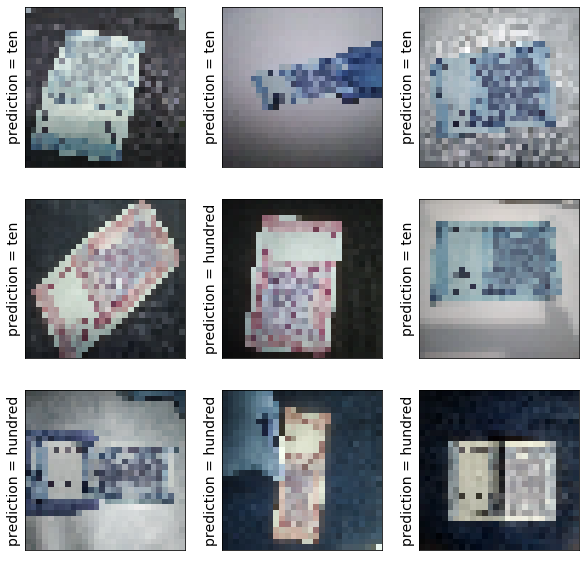

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

res = model.predict_classes(X_test[9:18])
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# show the plot
plt.show()

<Figure size 432x288 with 0 Axes>

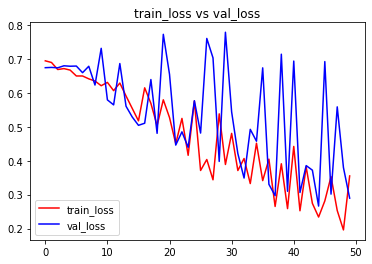

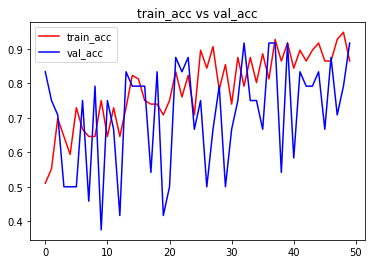

<Figure size 432x288 with 0 Axes>

In [18]:
# visualizing losses and accuracy

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()


In [20]:
# Evaluating the model

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['Hundreds', 'Tens']
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

Test Loss: 0.28948208689689636
Test accuracy: 0.9166666865348816
(1, 28, 28, 3)
[[0.13560663 0.86439335]]
[1]
[[0. 1.]]
[[0.13560666 0.86439335]
 [0.14948215 0.8505178 ]
 [0.03693289 0.96306705]
 [0.7966219  0.20337811]
 [0.68346024 0.3165397 ]
 [0.1628992  0.8371008 ]
 [0.21279357 0.7872064 ]
 [0.87900245 0.12099752]
 [0.701229   0.298771  ]
 [0.27162164 0.72837836]
 [0.0965237  0.90347624]
 [0.02416835 0.9758316 ]
 [0.42395774 0.5760423 ]
 [0.955523   0.04447701]
 [0.35826957 0.6417304 ]
 [0.5062123  0.49378774]
 [0.5740383  0.42596167]
 [0.91241705 0.08758299]
 [0.37684843 0.6231516 ]
 [0.5260378  0.4739622 ]
 [0.927068   0.072932  ]
 [0.06991281 0.9300872 ]
 [0.03295931 0.9670407 ]
 [0.02744169 0.9725583 ]]
[1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1]
              precision    recall  f1-score   support

    Hundreds       0.80      1.00      0.89         8
        Tens       1.00      0.88      0.93        16

    accuracy                           0.92        24
   macro av

Confusion matrix, without normalization
[[ 8  0]
 [ 2 14]]


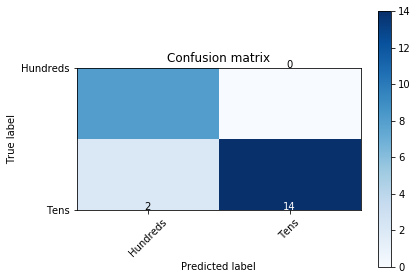

In [21]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.savefig("confusion.png")
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()